In [1]:
# import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# read the CSV file
df = pd.read_csv(r'C:\Users\Saemi\OneDrive\Education\WGU\D212 Data Mining II\PA\Dataset - Medical\medical_clean.csv')
# check the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [3]:
#Filter the data for the patients with high blood
filtered_df = df.loc[(df.HighBlood=="Yes")]
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4090 entries, 0 to 9997
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           4090 non-null   int64  
 1   Customer_id         4090 non-null   object 
 2   Interaction         4090 non-null   object 
 3   UID                 4090 non-null   object 
 4   City                4090 non-null   object 
 5   State               4090 non-null   object 
 6   County              4090 non-null   object 
 7   Zip                 4090 non-null   int64  
 8   Lat                 4090 non-null   float64
 9   Lng                 4090 non-null   float64
 10  Population          4090 non-null   int64  
 11  Area                4090 non-null   object 
 12  TimeZone            4090 non-null   object 
 13  Job                 4090 non-null   object 
 14  Children            4090 non-null   int64  
 15  Age                 4090 non-null   int64  
 16  Income     

In [4]:
#create new DataFrame with selected numerical variables
new_df = filtered_df[['Age', 'Income', 'Initial_days', 'TotalCharge']].copy()

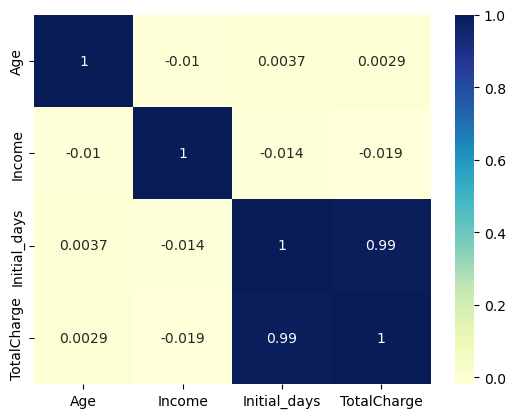

In [5]:
#Create Correlation Matrix Heatmap to find the most relevant 2 columns
corr_map = sns.heatmap(new_df.corr(numeric_only=True),
                       cmap="YlGnBu",
                       annot=True)
plt.show()

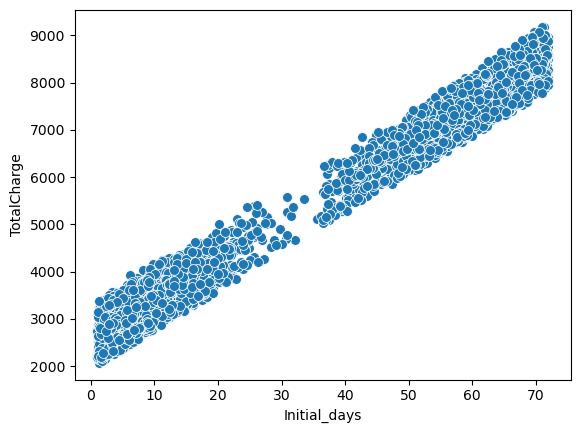

In [6]:
#Visualization for further exploration
selected_df = new_df[['Initial_days', 'TotalCharge']].copy()
ax = sns.scatterplot(data = selected_df,
                     x = 'Initial_days',
                     y = 'TotalCharge',
                     s = 50)

In [7]:
#Preprocessing the data
#Use StandardScaler to normalize the data 
scaler = StandardScaler()

In [8]:
scaled_df = scaler.fit_transform(selected_df)
scaled_df = pd.DataFrame(scaled_df, columns=selected_df.columns)
scaled_df.head()

,Initial_days,TotalCharge
0,-0.895361,-0.747279
1,-0.723478,-0.534415
2,-1.115277,-1.337047
3,-0.953145,-0.761915
4,-1.234043,-1.011413


In [9]:
scaled_df.describe().round(2)

,Initial_days,TotalCharge
count,4090.00,4090.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.26,-1.50
25%,-1.01,-0.98
50%,-0.13,-0.10
75%,1.01,0.99
max,1.43,1.74


In [10]:
scaled_df.to_csv('cleaned_dataset_copy.csv', index = False)

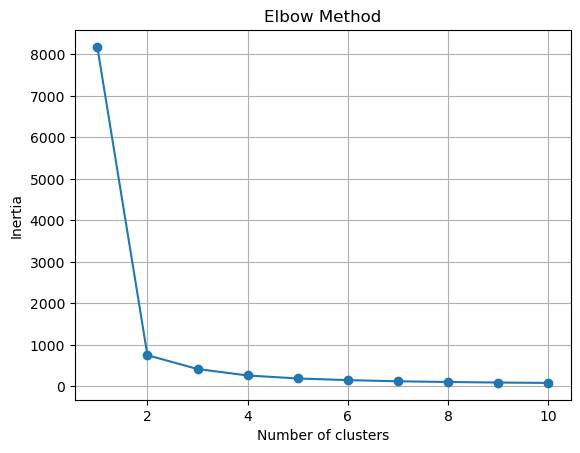

In [11]:
#Use Elbow Method to get the best number of clusters (Machine)
wcss =[]
for i in range(1, 11):
    kmeans = KMeans(n_init = 10, n_clusters = i)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

C:\Users\Saemi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Saemi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Saemi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Saemi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


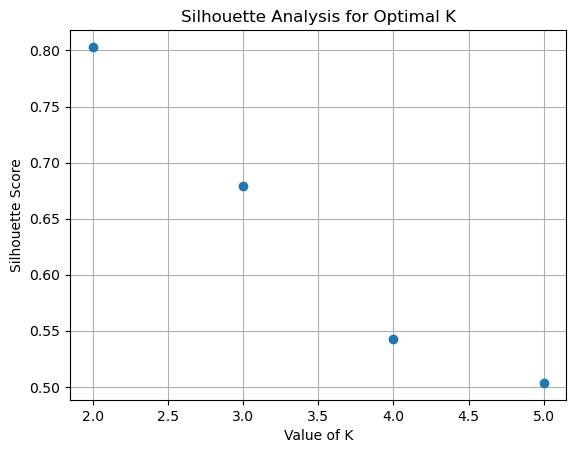

In [12]:
#Using Silhouette method to make sure the best K (Ankita)
range_n_clusters = [2, 3, 4, 5]
silhouette_avg = []
for num_clusters in range_n_clusters:
    #Initialize KMeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(scaled_df)
    cluster_labels = kmeans.labels_
    
    #Silhouette Score
    silhouette_avg.append(silhouette_score(scaled_df, cluster_labels))

#Plot
plt.plot(range_n_clusters, silhouette_avg, 'o')
plt.xlabel('Value of K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal K')
plt.grid()
plt.show()

In [13]:
#Result shows that the best k is 2
fin_model = KMeans(n_clusters=2, n_init=25, random_state=300)
fin_model.fit(scaled_df)

KMeans(n_clusters=2, n_init=25, random_state=300)

In [15]:
#Get centroids
centroid = pd.DataFrame(fin_model.cluster_centers_, columns=selected_df.columns)
centroid

,Initial_days,TotalCharge
0,-0.954520,-0.942895
1,0.962958,0.951231


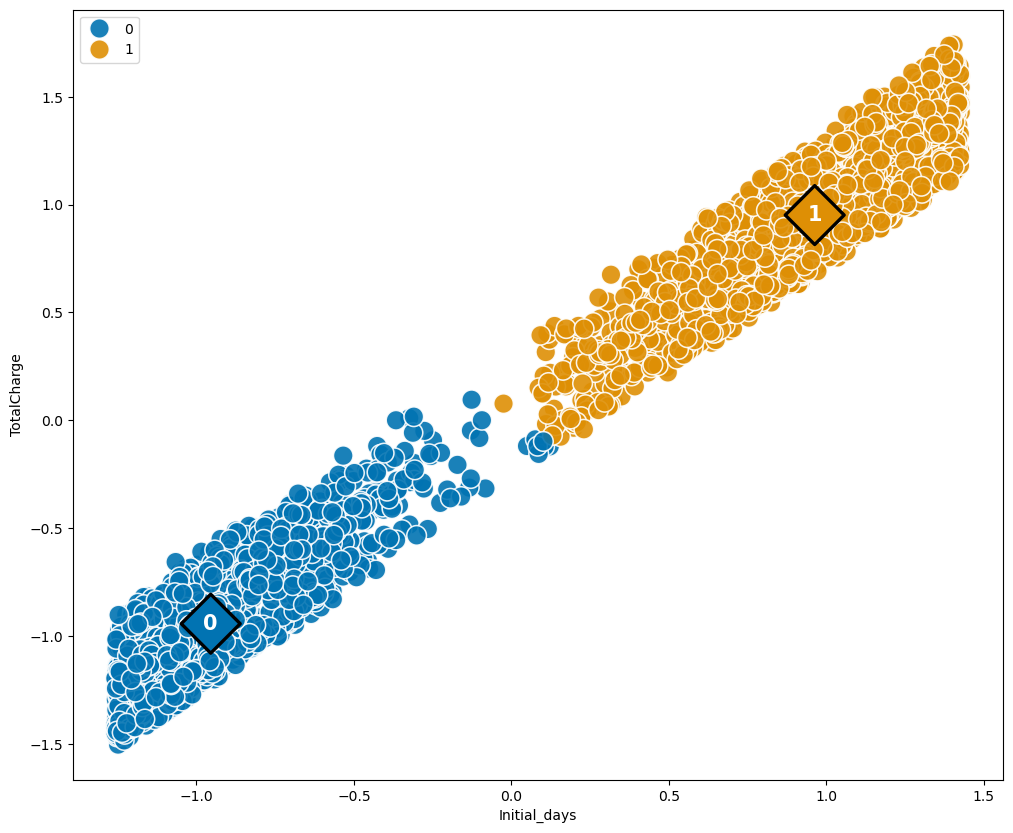

In [16]:
plt.figure(figsize=(8,4))

ax = sns.scatterplot(data = scaled_df, 
                     x = 'Initial_days',
                     y = 'TotalCharge',
                     hue = fin_model.labels_, 
                     palette= 'colorblind', 
                     alpha=0.9, s = 200, 
                     legend = True)

ax = sns.scatterplot(data = centroid,
                     x = 'Initial_days',
                     y = 'TotalCharge',
                     hue = centroid.index,
                     palette = 'colorblind',
                     s = 900,
                     marker = 'D',
                     ec = 'black',
                     legend = False)

for i in range(len(centroid)):
                plt.text(x = centroid.Initial_days[i],
                         y = centroid.TotalCharge[i],
                         s = i,
                         horizontalalignment = 'center',
                         verticalalignment = 'center',
                         size = 15,
                         weight = 'bold',
                         color = 'white')

In [18]:
selected_df['Cluster'] = fin_model.labels_.tolist()
selected_df.head(10)

,Initial_days,TotalCharge,Cluster
0,10.585770,3726.702860,0
1,15.129562,4193.190458,0
2,4.772177,2434.234222,0
6,9.058210,3694.627161,0
9,1.632554,3147.855813,0
10,2.595912,2837.861788,0
11,7.075083,3166.627638,0
18,7.302395,2698.883482,0
20,7.094503,3534.815016,0
22,3.798955,3430.725944,0


In [20]:
selected_df.agg({
    'Initial_days': 'median',
    'TotalCharge': 'median'
}).round(2)

Initial_days      30.89
TotalCharge     5155.47
dtype: float64

In [21]:
selected_df.groupby('Cluster').agg({
    'Initial_days': 'median',
    'TotalCharge': 'median'
})

,Initial_days,TotalCharge
Cluster,,
0,7.666465,3222.385341
1,61.170645,7549.208000
